<a href="https://colab.research.google.com/github/FZsara/neural-network-lab/blob/main/nn_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful

 * Detected Sugeno model type
{'Sepsis': 68.90324203600152}


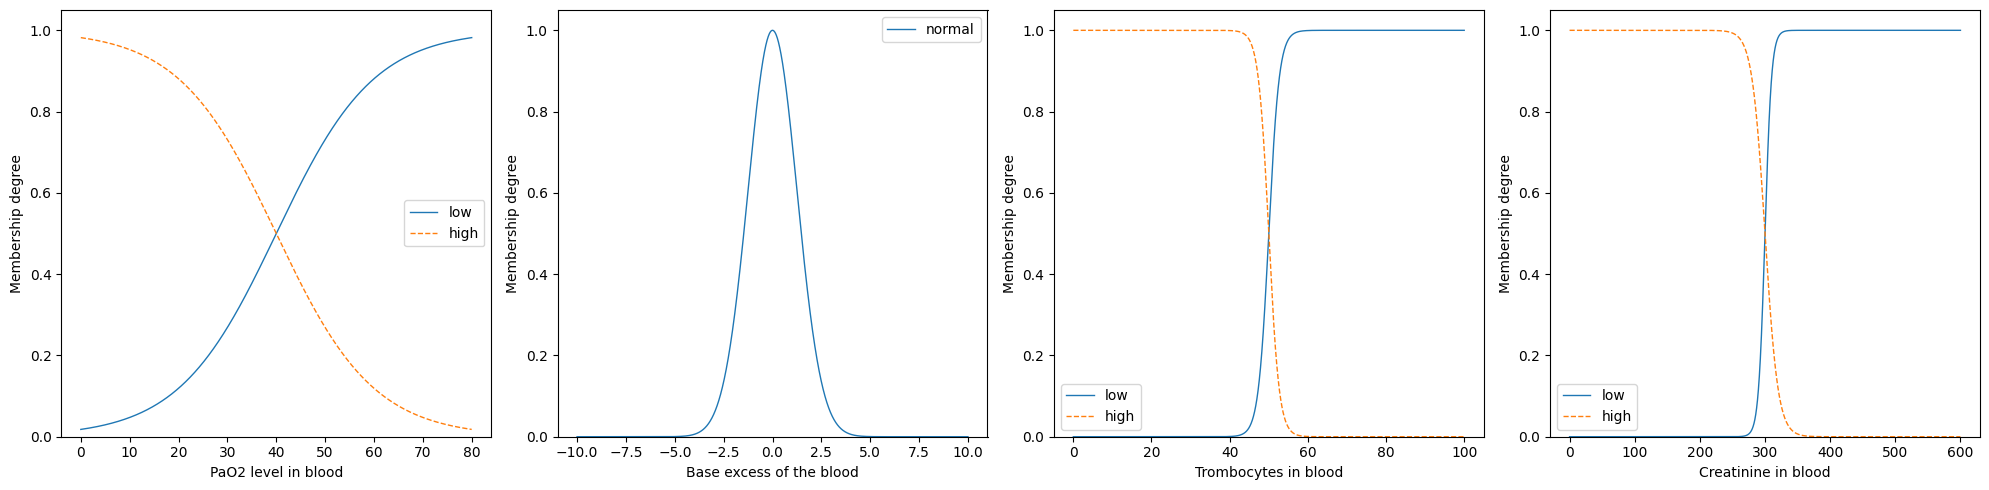

In [ ]:
!pip install simpful

from simpful import *

# A simple decision support model to diagnose sepsis in the ICU
# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets for the variable PaO2
P1 = FuzzySet(function=Sigmoid_MF(c=40, a=0.1), term="low")
P2 = FuzzySet(function=InvSigmoid_MF(c=40, a=0.1), term="high")
LV1 = LinguisticVariable([P1,P2], concept="PaO2 level in blood", universe_of_discourse=[0,80])
FS.add_linguistic_variable("PaO2", LV1)

# Define fuzzy sets for the variable base excess
B1 = FuzzySet(function=Gaussian_MF(mu=0,sigma=1.25), term="normal")
LV2 = LinguisticVariable([B1], concept="Base excess of the blood", universe_of_discourse=[-10,10])
FS.add_linguistic_variable("BaseExcess", LV2)

# Define fuzzy sets for the variable trombocytes
T1 = FuzzySet(function=Sigmoid_MF(c=50, a=0.75), term="low")
T2 = FuzzySet(function=InvSigmoid_MF(c=50, a=0.75), term="high")
LV3 = LinguisticVariable([T1,T2], concept="Trombocytes in blood", universe_of_discourse=[0,100])
FS.add_linguistic_variable("Trombocytes", LV3)

# Define fuzzy sets for the variable creatinine
C1 = FuzzySet(function=Sigmoid_MF(c=300, a=0.2), term="low")
C2 = FuzzySet(function=InvSigmoid_MF(c=300, a=0.1), term="high")
LV4 = LinguisticVariable([C1,C2], concept="Creatinine in blood", universe_of_discourse=[0,600])
FS.add_linguistic_variable("Creatinine", LV4)

# Plot all linguistic variables and save them in a output file
FS.produce_figure(outputfile='lvs.pdf')

# Define the consequents
FS.set_crisp_output_value("low_probability", 1)
FS.set_crisp_output_value("high_probability", 99)

# Define the fuzzy rules
RULE1 = "IF (PaO2 IS low) AND (Trombocytes IS high) AND (Creatinine IS high) AND (BaseExcess IS normal) THEN (Sepsis IS low_probability)"
RULE2 = "IF (PaO2 IS high) AND (Trombocytes IS low) AND (Creatinine IS low) AND (NOT(BaseExcess IS normal)) THEN (Sepsis IS high_probability)"

# Add fuzzy rules to the fuzzy reasoner object
FS.add_rules([RULE1, RULE2])

# Set antecedent values
FS.set_variable("PaO2", 50)
FS.set_variable("BaseExcess", -1.5)
FS.set_variable("Trombocytes", 50)
FS.set_variable("Creatinine", 320)

# Perform Sugeno inference and print output
print(FS.Sugeno_inference(["Sepsis"]))

In [ ]:
!pip install simpful

from simpful import *

# A simple decision support model to diagnose sepsis in the ICU
# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets for the variable PaO2
P1 = FuzzySet(function=Sigmoid_MF(c=40, a=0.1), term="low")
P2 = FuzzySet(function=InvSigmoid_MF(c=40, a=0.1), term="high")
LV1 = LinguisticVariable([P1, P2], concept="PaO2 level in blood", universe_of_discourse=[0, 80])
FS.add_linguistic_variable("PaO2", LV1)

# Define fuzzy sets for the variable base excess
B1 = FuzzySet(function=Gaussian_MF(mu=0, sigma=1.25), term="normal")
B2 = FuzzySet(function=Trapezoidal_MF(a=-10, b=-10, c=-1.5, d=0), term="low")  # Example additional fuzzy set
LV2 = LinguisticVariable([B1, B2], concept="Base excess of the blood", universe_of_discourse=[-10, 10])
FS.add_linguistic_variable("BaseExcess", LV2)

# Define fuzzy sets for the variable trombocytes
T1 = FuzzySet(function=Sigmoid_MF(c=50, a=0.75), term="low")
T2 = FuzzySet(function=InvSigmoid_MF(c=50, a=0.75), term="high")
LV3 = LinguisticVariable([T1, T2], concept="Trombocytes in blood", universe_of_discourse=[0, 100])
FS.add_linguistic_variable("Trombocytes", LV3)

# Define fuzzy sets for the variable creatinine
C1 = FuzzySet(function=Sigmoid_MF(c=300, a=0.2), term="low")
C2 = FuzzySet(function=InvSigmoid_MF(c=300, a=0.1), term="high")
LV4 = LinguisticVariable([C1, C2], concept="Creatinine in blood", universe_of_discourse=[0, 600])
FS.add_linguistic_variable("Creatinine", LV4)

# Define fuzzy sets for the output variable (Sepsis probability)
S1 = FuzzySet(function=Triangular_MF(a=0, b=1, c=50), term="low_probability")
S2 = FuzzySet(function=Triangular_MF(a=50, b=99, c=100), term="high_probability")
LV5 = LinguisticVariable([S1, S2], concept="Sepsis probability", universe_of_discourse=[0, 100])
FS.add_linguistic_variable("Sepsis", LV5)

# Define the fuzzy rules
RULE1 = "IF (PaO2 IS low) AND (Trombocytes IS high) AND (Creatinine IS high) AND (BaseExcess IS normal) THEN (Sepsis IS low_probability)"
RULE2 = "IF (PaO2 IS high) AND (Trombocytes IS low) AND (Creatinine IS low) AND (NOT(BaseExcess IS normal)) THEN (Sepsis IS high_probability)"

# Add fuzzy rules to the fuzzy reasoner object
FS.add_rules([RULE1, RULE2])

# Set antecedent values
FS.set_variable("PaO2", 50)
FS.set_variable("BaseExcess", -1.5)
FS.set_variable("Trombocytes", 50)
FS.set_variable("Creatinine", 320)

# Perform Mamdani inference and print output
output = FS.Mamdani_inference(["Sepsis"])
print("Sepsis diagnosis result (Mamdani inference):", output)


  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful

Sepsis diagnosis result (Mamdani inference): {'Sepsis': 60.35856448908269}


In [ ]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets and linguistic variables
S_1 = FuzzySet(points=[[0., 1.],  [5., 0.]], term="poor")
S_2 = FuzzySet(points=[[0., 0.], [5., 1.], [10., 0.]], term="good")
S_3 = FuzzySet(points=[[5., 0.],  [10., 1.]], term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality"))

F_1 = FuzzySet(points=[[0., 1.],  [10., 0.]], term="rancid")
F_2 = FuzzySet(points=[[0., 0.],  [10., 1.]], term="delicious")
FS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality"))

# Define output crisp values
FS.set_crisp_output_value("small", 5)
FS.set_crisp_output_value("average", 15)

# Define function for generous tip (food score + service score + 5%)
FS.set_output_function("generous", "Food+Service+5")

# Define fuzzy rules
R1 = "IF (Service IS poor) OR (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS.add_rules([R1, R2, R3])

# Set antecedents values
FS.set_variable("Service", 4)
FS.set_variable("Food", 8)

# Perform Sugeno inference and print output
print(FS.Sugeno_inference(["Tip"]))

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful

 * Detected Sugeno model type
{'Tip': 14.777777777777779}


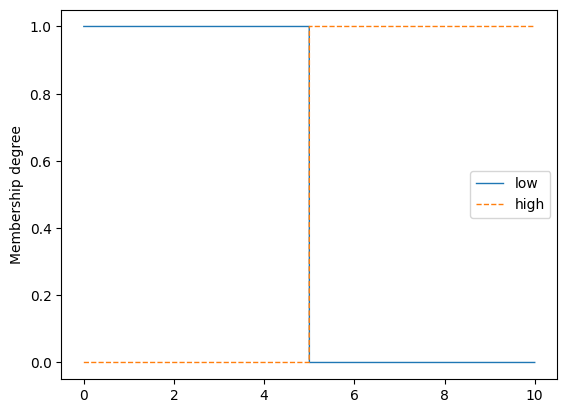

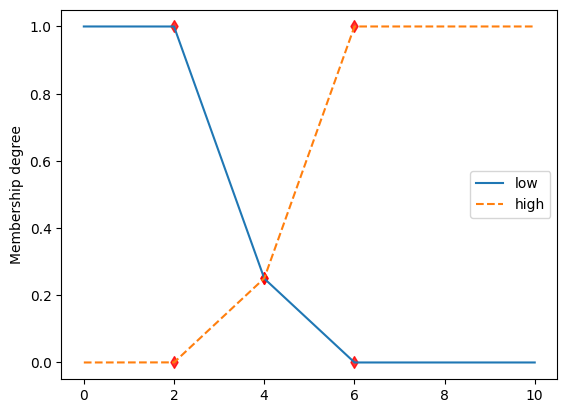

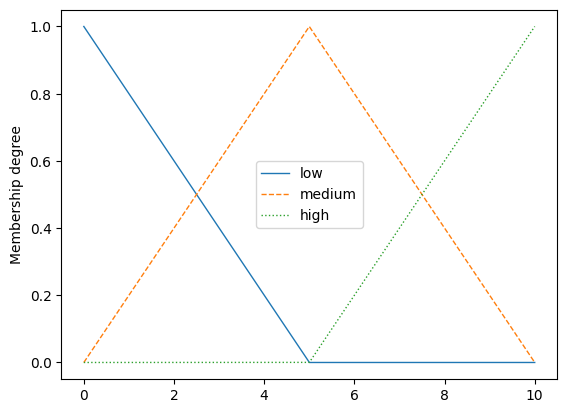

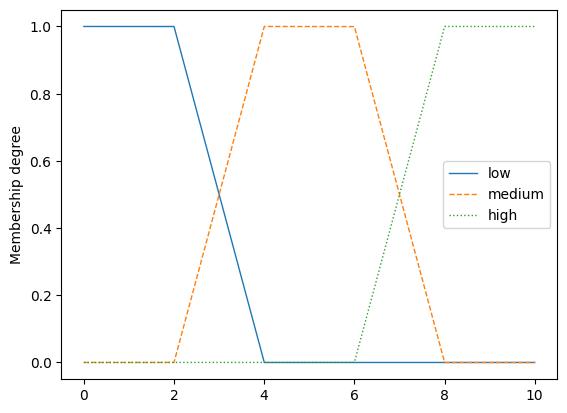

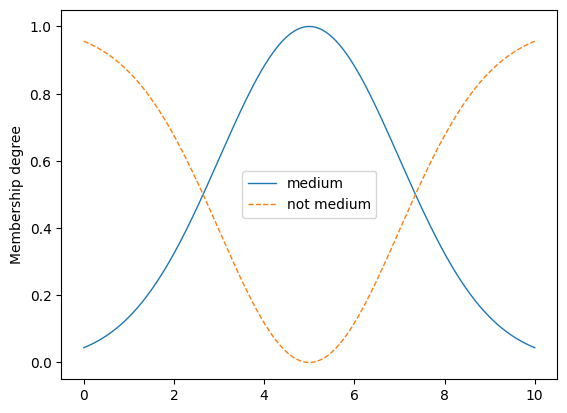

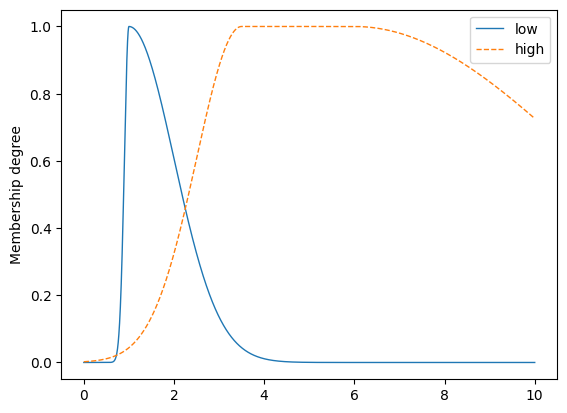

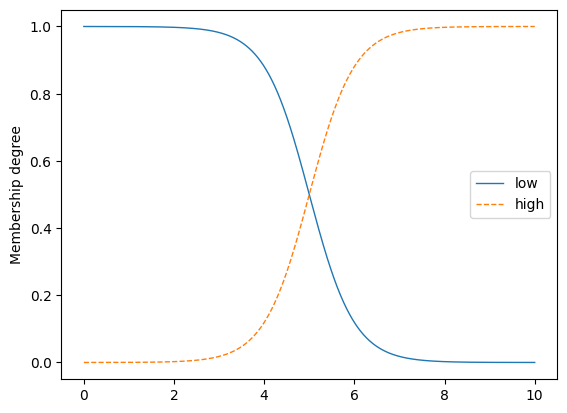

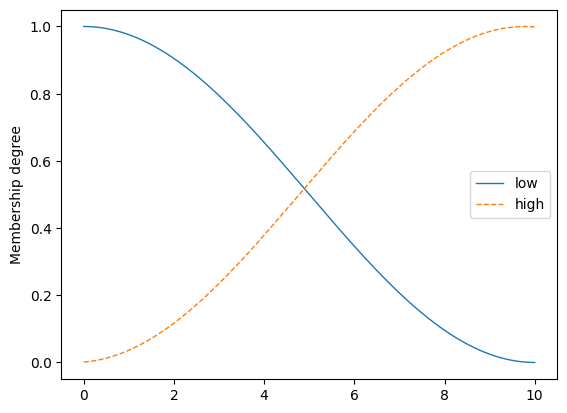

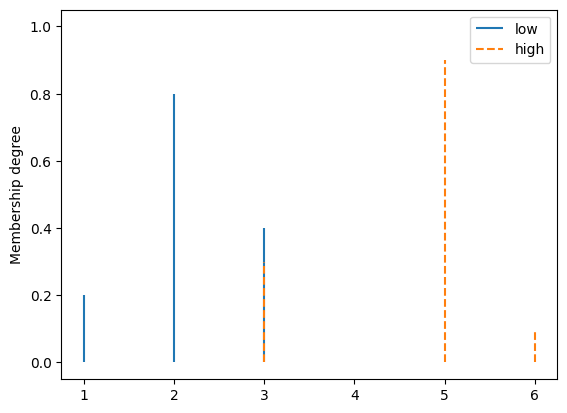

In [ ]:
import simpful as sf

# A showcase of available fuzzy sets.

# Crisp
C_1 = sf.CrispSet(a=0, b=5, term="low")
C_2 = sf.CrispSet(a=5, b=10, term="high")
sf.LinguisticVariable([C_1, C_2], universe_of_discourse=[0, 10]).plot()

# Point-based polygon
P_1 = sf.FuzzySet(points=[[2.0, 1.0], [4.0, 0.25], [6.0, 0.0]], term="low")
P_2 = sf.FuzzySet(points=[[2.0, 0.0], [4.0, 0.25], [6.0, 1.0]], term="high")
sf.LinguisticVariable([P_1, P_2], universe_of_discourse=[0, 10]).plot()

# Triangle
Tri_1 = sf.TriangleFuzzySet(a=0, b=0, c=5, term="low")
Tri_2 = sf.TriangleFuzzySet(a=0, b=5, c=10, term="medium")
Tri_3 = sf.TriangleFuzzySet(a=5, b=10, c=10, term="high")
sf.LinguisticVariable([Tri_1, Tri_2, Tri_3], universe_of_discourse=[0, 10]).plot()

# Trapezoid
Tra_1 = sf.TrapezoidFuzzySet(a=0, b=0, c=2, d=4, term="low")
Tra_2 = sf.TrapezoidFuzzySet(a=2, b=4, c=6, d=8, term="medium")
Tra_3 = sf.TrapezoidFuzzySet(a=6, b=8, c=10, d=10, term="high")
sf.LinguisticVariable([Tra_1, Tra_2, Tra_3], universe_of_discourse=[0, 10]).plot()

# Gaussian
G_1 = sf.GaussianFuzzySet(mu=5, sigma=2, term="medium")
G_2 = sf.InvGaussianFuzzySet(mu=5, sigma=2, term="not medium")
sf.LinguisticVariable([G_1, G_2], universe_of_discourse=[0, 10]).plot()

# Double Gaussian
DG_1 = sf.DoubleGaussianFuzzySet(mu1=1, sigma1=0.1, mu2=1, sigma2=1, term="low")
DG_2 = sf.DoubleGaussianFuzzySet(mu1=3.5, sigma1=1, mu2=6, sigma2=5, term="high")
sf.LinguisticVariable([DG_1, DG_2], universe_of_discourse=[0, 10]).plot()

# Sigmoid
S_1 = sf.InvSigmoidFuzzySet(c=5, a=2, term="low")
S_2 = sf.SigmoidFuzzySet(c=5, a=2, term="high")
sf.LinguisticVariable([S_1, S_2], universe_of_discourse=[0, 10]).plot()

# Function-based fuzzy set
import numpy as np
def fun1(x):
    return 0.5*np.cos(0.314*x)+0.5
def fun2(x):
    return 0.5*np.sin(0.314*x-1.5)+0.5

F_1 = sf.FuzzySet(function=fun1, term="low")
F_2 = sf.FuzzySet(function=fun2, term="high")
sf.LinguisticVariable([F_1, F_2], universe_of_discourse=[0, 10]).plot()

# Singletons set
Ss_1 = sf.SingletonsSet(pairs=[[1.0, 0.2], [2.0, 0.8], [3.0, 0.4]], term="low")
Ss_2 = sf.SingletonsSet(pairs=[[3.0, 0.3], [5.0, 0.9], [6.0, 0.1]], term="high")
sf.LinguisticVariable([Ss_1, Ss_2], universe_of_discourse=[0, 10]).plot()

In [ ]:
from simpful import *

# Create a fuzzy system object
FS = FuzzySystem()

# Define triangular fuzzy sets for "Service" linguistic variable
Tri_Service_Poor = TriangleFuzzySet(a=0, b=0, c=5, term="poor")
Tri_Service_Good = TriangleFuzzySet(a=0, b=5, c=10, term="good")
Tri_Service_Excellent = TriangleFuzzySet(a=5, b=10, c=10, term="excellent")
FS.add_linguistic_variable("Service",
    LinguisticVariable([Tri_Service_Poor, Tri_Service_Good, Tri_Service_Excellent], universe_of_discourse=[0, 10]))

# Define triangular fuzzy sets for "Food" linguistic variable
Tri_Food_Rancid = TriangleFuzzySet(a=0, b=0, c=5, term="rancid")
Tri_Food_Delicious = TriangleFuzzySet(a=0, b=5, c=10, term="delicious")
FS.add_linguistic_variable("Food",
    LinguisticVariable([Tri_Food_Rancid, Tri_Food_Delicious], universe_of_discourse=[0, 10]))

# Define crisp output values for the fuzzy system
FS.set_crisp_output_value("small", 5)
FS.set_crisp_output_value("average", 15)

# Define a Sugeno function for "generous" output (based on input variables)
FS.set_output_function("generous", "Food + Service + 5")

# Add rules to the system
R1 = "IF (Service IS poor) OR (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS.add_rules([R1, R2, R3])

# Set the input values
FS.set_variable("Service", 7)  # Example: Service quality = 7
FS.set_variable("Food", 8)     # Example: Food quality = 8

# Perform Sugeno inference and print the output
print(FS.Sugeno_inference(["Tip"]))


  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful

 * Detected Sugeno model type
{'Tip': 17.0}


In [ ]:
from simpful import *

# Create a fuzzy system object
FS = FuzzySystem()

# Step 1: Define Membership Functions
# Service Quality Membership Functions
S_poor = FuzzySet(points=[[0, 1], [5, 0]], term="poor")
S_average = FuzzySet(points=[[2, 0], [5, 1], [8, 0]], term="average")
S_excellent = FuzzySet(points=[[5, 0], [10, 1]], term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_poor, S_average, S_excellent], concept="Service quality"))

# Food Quality Membership Functions
F_bad = FuzzySet(points=[[0, 1], [5, 0]], term="bad")
F_good = FuzzySet(points=[[2, 0], [5, 1], [8, 0]], term="good")
F_great = FuzzySet(points=[[5, 0], [10, 1]], term="great")
FS.add_linguistic_variable("Food", LinguisticVariable([F_bad, F_good, F_great], concept="Food quality"))

# Step 2: Define Functional Outputs for TSK Rules
FS.set_crisp_output_value("constant_low", 5)  # Rule 1: Constant output
FS.set_output_function("linear", "10 + 0.5 * Service + 0.5 * Food")  # Rule 2: Linear function
FS.set_crisp_output_value("constant_high", 15)  # Rule 3: Constant output

# Step 3: Define Fuzzy Rules
R1 = "IF (Service IS poor) OR (Food IS bad) THEN (Tip IS constant_low)"
R2 = "IF (Service IS average) AND (Food IS good) THEN (Tip IS linear)"
R3 = "IF (Service IS excellent) OR (Food IS great) THEN (Tip IS constant_high)"
FS.add_rules([R1, R2, R3])

# Step 4: Set Antecedent Values
FS.set_variable("Service", 7)
FS.set_variable("Food", 8)

# Perform TSK Inference
tip = FS.Sugeno_inference(["Tip"])
print("Recommended Tip:", tip)

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful

 * Detected Sugeno model type
Recommended Tip: {'Tip': 15.0}
